# Pregunta 1

In [21]:
import networkx as nx
import matplotlib.pyplot as plt #Contenedor de nodos para graficar
import pandas as pd
import numpy as np
import sys
from queue import PriorityQueue

In [4]:
%%file vertices2.csv
ID_Calle,ID_Interseccion,Costo
4827820,4827937,14
4827820,4828021,15
4827832,4827849,13
4827832,4827860,9
4827832,4827863,13
4827843,4827820,22
4827843,4827892,15
4827843,4827894,18
4827845,4827820,24
4827845,4827908,25
4827845,4827878,20
4827849,4827909,14
4827849,4827926,10
4827849,4827937,14
4827860,4827878,20
4827863,4827843,10
4827863,4827937,14
4827876,4827820,14
4827876,4827878,20
4827876,4827883,22
4827878,4827896,11
4827878,4827908,25
4827883,4827845,24
4827883,4827843,10
4827892,4827883,22
4827892,4827820,15
4827892,4827894,18
4827894,4827832,16
4827894,4827843,10
4827894,4827845,24
4827896,4827894,18
4827896,4828021,15
4827908,4827832,16
4827908,4827860,9
4827908,4828021,15
4827909,4827863,13
4827926,4827896,11
4827937,4827820,14
4827937,4827845,24
4828021,4827860,9
4828021,4827843,10
4828025,4828352,23
4828025,4827892,15
4828025,4827843,10
4828352,4827863,13
4828352,4827909,14

Overwriting vertices2.csv


In [117]:
%%file vertices_noid0.csv
inicio,final,costo
0,16,14
0,17,15
1,4,13
1,5,9
1,6,13
2,0,22
2,10,15
2,11,18
3,0,24
3,13,25
3,8,20
4,14,14
4,15,10
4,16,14
5,8,20
6,2,10
6,16,14
7,0,14
7,8,20
7,9,22
8,12,11
8,13,25
9,3,24
9,2,10
10,0,15
10,11,18
11,1,16
11,2,10
11,3,24
12,11,18
12,17,15
13,1,16
13,5,9
13,17,15
14,6,13
15,12,11
16,0,14
16,3,24
17,5,9
17,2,10
18,19,23
18,10,15
18,2,10
19,6,13
19,14,14

Overwriting vertices_noid0.csv


In [118]:
%%file vertices_noid01.csv
inicio,final,costo,horario
0,16,14,1
0,17,15,1
1,4,13,2
1,5,9,2
1,6,13,2
2,0,22,1
2,10,15,1
2,11,18,1
3,0,24,1
3,13,25,1
3,8,20,1
4,14,14,3
4,15,10,3
4,16,14,3
5,8,20,3
6,2,10,3
6,16,14,3
7,0,14,2
7,8,20,2
7,9,22,2
8,12,11,1
8,13,25,1
9,3,24,1
9,2,10,1
10,0,15,3
10,11,18,
11,1,16,2
11,2,10,2
11,3,24,2
12,11,18,3
12,17,15,3
13,1,16,3
13,5,9,3
13,17,15
14,6,13,2
15,12,11,1
16,0,14,3
16,3,24,3
17,5,9,3
17,2,10,3
18,19,23,2
18,10,15,2
18,2,10,2
19,6,13,1
19,14,14,1

Overwriting vertices_noid01.csv


Ingrese la hora (1-24):
13
Arista 	Peso
5 1 	 14
6 2 	 10
8 3 	 20
16 4 	 14
17 5 	 9
16 6 	 14
0 7 	 19
12 8 	 11
2 9 	 10
0 10 	 15
2 11 	 15
15 12 	 11
5 13 	 9
4 14 	 14
4 15 	 10
0 16 	 14
2 17 	 10
2 18 	 15
6 19 	 13

Vertex 	 Distance from Source
0 		 19
1 		 57
2 		 37
3 		 43
4 		 47
5 		 43
6 		 47
7 		 0
8 		 25
9 		 27
10 		 34
11 		 52
12 		 36
13 		 49
14 		 61
15 		 47
16 		 33
17 		 34
18 		 52
19 		 60


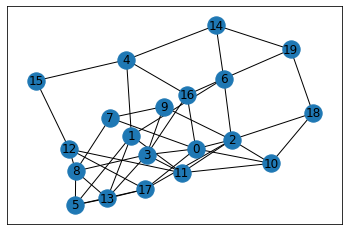

In [135]:
class Graph():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                    for row in range(vertices)]
    # Inicio de Prim
    def printMST(self, parent):
        print ("Arista \tPeso")
        for i in range(1, self.V):
            print (parent[i], i, "\t", self.graph[i][parent[i]])
    def minKey(self, key, mstSet):
        min = sys.maxsize
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
        return min_index
    def primMST(self):
        key = [sys.maxsize] * self.V
        parent = [None] * self.V
        key[0] = 0
        mstSet = [False] * self.V
 
        parent[0] = -1 # Raiz
 
        for cout in range(self.V):
            u = self.minKey(key, mstSet)
            mstSet[u] = True
            for v in range(self.V):
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                        key[v] = self.graph[u][v]
                        parent[v] = u
        self.printMST(parent)
    #Fin Prim
    
    #Inicio Dijkstra
    def printSolution(self, dist):
        print("\nVertex \t Distance from Source")
        for node in range(self.V):
            print(node, "\t\t", dist[node])
    def minDistance(self, dist, sptSet):
        min = 1e7
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
        return min_index
    def dijkstra(self, src):
        dist = [1e7] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
        for cout in range(self.V):
            u = self.minDistance(dist, sptSet)
            sptSet[u] = True
            for v in range(self.V):
                if (self.graph[u][v] > 0 and
                   sptSet[v] == False and
                   dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]
 
        self.printSolution(dist)
    #Fin Dijkstra


def leer_csv():
    datos=pd.read_csv('vertices_noid01.csv',header=0)
    idcalle=datos['inicio']
    idorigeninterseccion=datos['final']
    costo=datos['costo']
    hora=datos['horario']
    matriz=[]
    for r in range(20):
        fila=[]
        for c in range(20):
            fila.append(0)
        matriz.append(fila)
    print("Ingrese la hora (1-24):")
    a=input()
    horario=int(a)
    
    for i in range(0,45):
        aux=0
        if(hora[i]==1 and horario>=1 and horario<=9):
            aux=5
        if(hora[i]==2 and horario>=10 and horario<=16):
            aux=5
        if(hora[i]==3 and horario>=17 and horario<=24):
            aux=5
        matriz[idcalle[i]][idorigeninterseccion[i]]=aux+costo[i]
        matriz[idorigeninterseccion[i]][idcalle[i]]=aux+costo[i]
    return matriz

def graficar(test2):
    pos=nx.spring_layout(test2)
    nx.draw_networkx(test2,pos)
    labels = nx.get_edge_attributes(test2,'weight')
    nx.draw_networkx_edge_labels(test2,pos,edge_labels=labels)

if __name__=="__main__":
    k = pd.read_csv('vertices_noid0.csv',header=0)
    test2=nx.from_pandas_edgelist(k,source='inicio',target='final',edge_attr='costo')
    matrix=leer_csv()
    graficar(test2)
    aux = Graph(20)
    aux.graph = matrix
    aux.primMST();
    aux.dijkstra(7);

In [7]:
def dijkstra(inicio,final):
    djk_path=nx.dijkstra_path(test2,inicio,final,weight=True)
    print(djk_path)
    ruta=test2.subgraph(djk_path)
    nx.draw(ruta,with_labels=True)

[19, 18, 2]


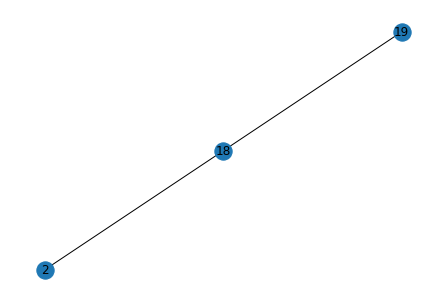

In [397]:
dijkstra(19,2)

[15, 4, 16, 3, 9]


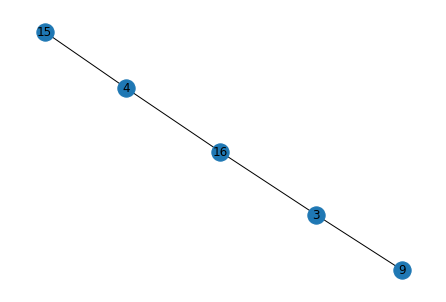

In [398]:
dijkstra(15,9)

[0, 16, 4, 14]


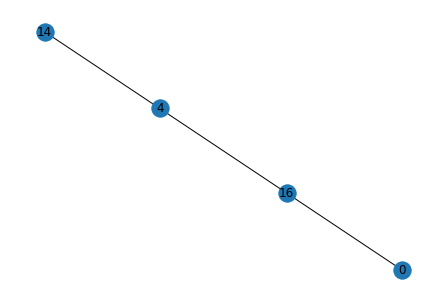

In [399]:
dijkstra(0,14)